In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

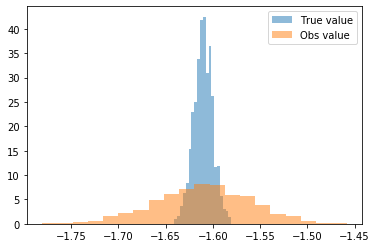

In [2]:
N=1000
mu=-1.61
sigma=0.01
sigma_obs=0.05
Xtrue=np.random.randn(N)*sigma+mu
Xobs=np.random.randn(N)*sigma_obs+Xtrue

plt.hist(Xtrue,bins=20,alpha=0.5,density=True,label='True value')
plt.hist(Xobs,bins=20,alpha=0.5,density=True, label='Obs value')
plt.legend()
plt.show()

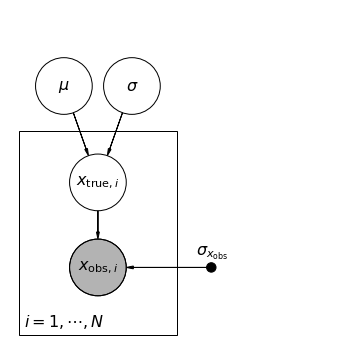

In [3]:
from matplotlib import rc
rc("font", family="serif", size=16)
import daft
pgm = daft.PGM([3,3], grid_unit=4, node_unit=2)
# Hierarchical parameters.
pgm.add_node(daft.Node("mu", r"$\mu$", 0.7, 2.6))
pgm.add_node(daft.Node("sigma", r"$\sigma$", 1.3, 2.6))
# Add latent variables 
pgm.add_node(daft.Node("x_true", r"$x_{{\rm true},i}$", 1, 1.75))
# Data.
pgm.add_node(daft.Node("x_obs", r"$x_{{\rm obs},i}$", 1, 1, observed=True))
pgm.add_node(daft.Node("err", r"$\sigma_{x_{\rm obs}}$", 2, 1.0, fixed=True, offset=[0.4,0.4]))
# Add in the edges.
pgm.add_edge("mu", "x_true")
pgm.add_edge("sigma", "x_true")
pgm.add_edge("x_true", "x_obs")
pgm.add_edge("err", "x_obs")
# And a plate.
pgm.add_plate(daft.Plate([0.3, 0.5, 1.4, 1.7], label=r"$i = 1, \cdots, N$",
    shift=-0.1))
pgm.render()

In [99]:
model=pm.Model()
with model:
    mu=pm.Normal('mu',-1.61,0.5)
    sigma=pm.HalfNormal('sigma',0.5)
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, sigma_obs, observed=Xobs)

with model:
    trace = pm.sample(tune=40000)

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 81000/81000 [09:16<00:00, 145.68draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-1.609997,0.001780,0.000124,-1.613539,-1.606509,140.584498,1.001117
xtrue__0,-1.607653,0.014953,0.000380,-1.636555,-1.578679,1409.308921,0.999278
xtrue__1,-1.605004,0.015128,0.000443,-1.633453,-1.573326,1258.261261,0.999209
xtrue__2,-1.611396,0.015028,0.000414,-1.641140,-1.584309,1286.415508,0.999000
xtrue__3,-1.612511,0.014810,0.000414,-1.641765,-1.583265,1262.367791,0.999006
xtrue__4,-1.608934,0.014362,0.000399,-1.639302,-1.582058,1253.605944,0.999025
xtrue__5,-1.610692,0.013643,0.000297,-1.638168,-1.583685,1772.529435,0.999056
xtrue__6,-1.610871,0.014785,0.000387,-1.636664,-1.575806,1456.968473,0.999034
xtrue__7,-1.608286,0.015235,0.000410,-1.637995,-1.577965,1246.064588,1.000986
xtrue__8,-1.610091,0.014707,0.000411,-1.637196,-1.578263,1668.743039,0.999000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015204A2A828>,
      dtype=object)

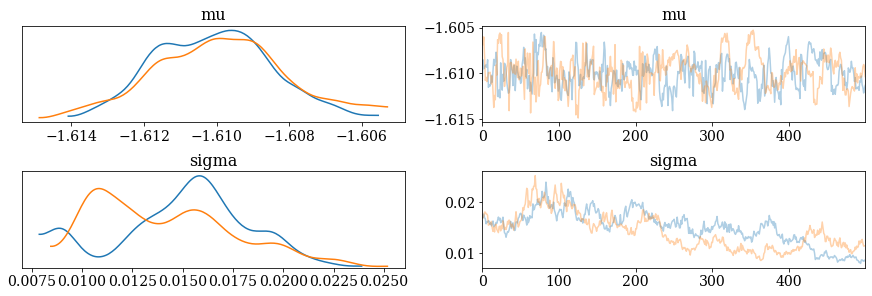

In [100]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])

TypeError: TensorType does not support iteration. Maybe you are using builtin.sum instead of theano.tensor.sum? (Maybe .max?)

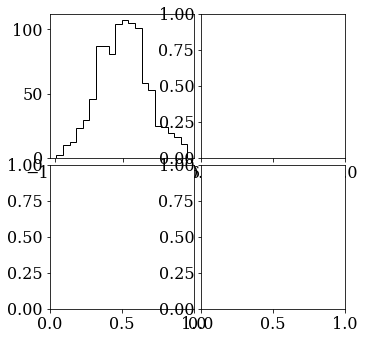

In [104]:
import corner
data = np.vstack([trace['mu'], trace['sigma']]).T
corner.corner(data, labels=['mu', 'sigma'], truths=[mu, sigma])
plt.show()

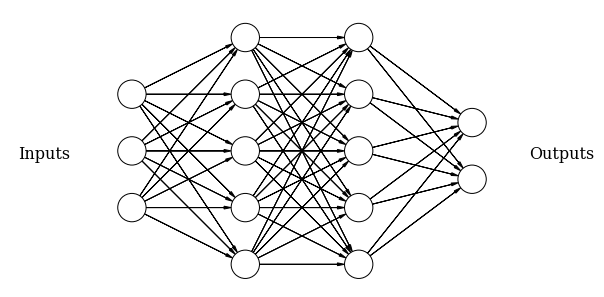

In [94]:
pgm = daft.PGM([5.2,2.5], grid_unit=4, node_unit=1)
x=1
# Hierarchical parameters.
pgm.add_node(daft.Node("A1", "", x+0.5, 1))
pgm.add_node(daft.Node("A2", "", x+0.5, 1.5))
pgm.add_node(daft.Node("A3", "", x+0.5, 2))

pgm.add_node(daft.Node("B1", "", x+1.5, 0.5))
pgm.add_node(daft.Node("B2", "", x+1.5, 1))
pgm.add_node(daft.Node("B3", "", x+1.5, 1.5))
pgm.add_node(daft.Node("B4", "", x+1.5, 2))
pgm.add_node(daft.Node("B5", "", x+1.5, 2.5))

pgm.add_node(daft.Node("C1", "", x+2.5, 0.5))
pgm.add_node(daft.Node("C2", "", x+2.5, 1))
pgm.add_node(daft.Node("C3", "", x+2.5, 1.5))
pgm.add_node(daft.Node("C4", "", x+2.5, 2))
pgm.add_node(daft.Node("C5", "", x+2.5, 2.5))

pgm.add_node(daft.Node("D1", "", x+3.5, 1.25))
pgm.add_node(daft.Node("D2", "", x+3.5, 1.75))
# Add in the edges.
pgm.add_edge("A1", "B1")
pgm.add_edge("A1", "B2")
pgm.add_edge("A1", "B3")
pgm.add_edge("A1", "B4")
pgm.add_edge("A1", "B5")

pgm.add_edge("A2", "B1")
pgm.add_edge("A2", "B2")
pgm.add_edge("A2", "B3")
pgm.add_edge("A2", "B4")
pgm.add_edge("A2", "B5")

pgm.add_edge("A3", "B1")
pgm.add_edge("A3", "B2")
pgm.add_edge("A3", "B3")
pgm.add_edge("A3", "B4")
pgm.add_edge("A3", "B5")

pgm.add_edge("B1", "C1")
pgm.add_edge("B1", "C2")
pgm.add_edge("B1", "C3")
pgm.add_edge("B1", "C4")
pgm.add_edge("B1", "C5")

pgm.add_edge("B2", "C1")
pgm.add_edge("B2", "C2")
pgm.add_edge("B2", "C3")
pgm.add_edge("B2", "C4")
pgm.add_edge("B2", "C5")

pgm.add_edge("B3", "C1")
pgm.add_edge("B3", "C2")
pgm.add_edge("B3", "C3")
pgm.add_edge("B3", "C4")
pgm.add_edge("B3", "C5")

pgm.add_edge("B4", "C1")
pgm.add_edge("B4", "C2")
pgm.add_edge("B4", "C3")
pgm.add_edge("B4", "C4")
pgm.add_edge("B4", "C5")

pgm.add_edge("B5", "C1")
pgm.add_edge("B5", "C2")
pgm.add_edge("B5", "C3")
pgm.add_edge("B5", "C4")
pgm.add_edge("B5", "C5")

pgm.add_edge("C1", "D1")
pgm.add_edge("C1", "D2")

pgm.add_edge("C2", "D1")
pgm.add_edge("C2", "D2")

pgm.add_edge("C3", "D1")
pgm.add_edge("C3", "D2")

pgm.add_edge("C4", "D1")
pgm.add_edge("C4", "D2")

pgm.add_edge("C5", "D1")
pgm.add_edge("C5", "D2")

pgm.add_text(0.5,1.4,'Inputs')
pgm.add_text(5,1.4,'Outputs')
# And a plate.
pgm.render()

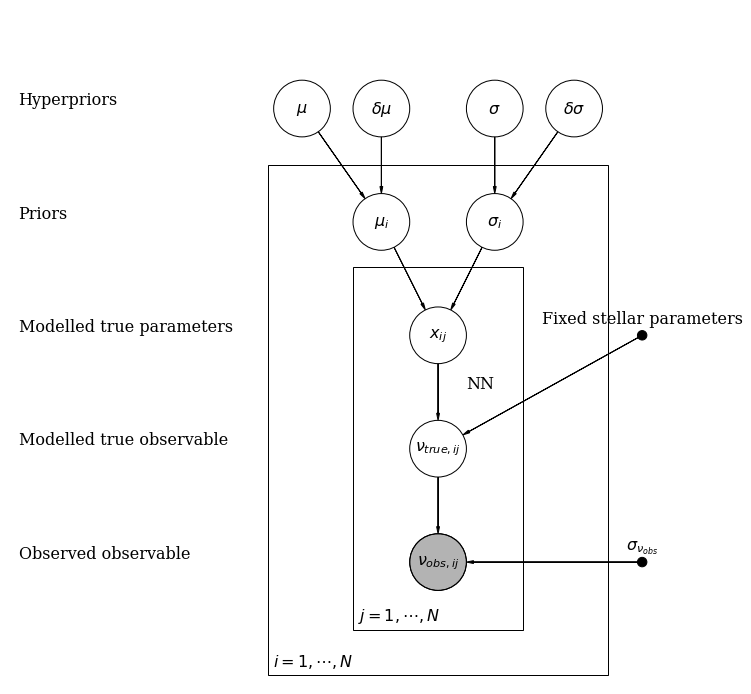

In [92]:
pgm = daft.PGM([6.5,6], grid_unit=4, node_unit=2)
x=2.5
y=6
pgm.add_text(0.5,y-0.5,'Hyperpriors')
pgm.add_node(daft.Node("mu", r"$\mu$",x+0.5,y-0.5))
pgm.add_node(daft.Node("del mu", r"$\delta \mu$",x+1.2,y-0.5))
pgm.add_node(daft.Node("sigma", r"$\sigma$",x+2.2,y-0.5))
pgm.add_node(daft.Node("del sigma", r"$\delta \sigma$",x+2.9,y-0.5))

pgm.add_text(0.5,y-1.5,'Priors')
pgm.add_node(daft.Node("mu_i", r"$\mu_i$",x+1.2,y-1.5))
pgm.add_node(daft.Node("sigma_i", r"$\sigma_i$", x+2.2,y-1.5))

pgm.add_text(0.5,y-2.5,'Modelled true parameters')
coord=((0.5+1.2)/2+(2.2+2.9)/2)/2
pgm.add_node(daft.Node("X_i",r"$x_{ij}$",x+coord,y-2.5))
pgm.add_node(daft.Node("K",'Fixed stellar parameters',x+3.5,y-2.5,fixed=True, offset=[0,0]))

pgm.add_text(x+coord+0.25,y-3,'NN')

pgm.add_text(0.5,y-3.5,'Modelled true observable')
pgm.add_node(daft.Node("nu_true",r"$\nu_{true,ij}$",x+coord,y-3.5))

pgm.add_text(0.5,y-4.5,'Observed observable')
pgm.add_node(daft.Node("nu_obs",r"$\nu_{obs,ij}$",x+coord,y-4.5,observed=True))
pgm.add_node(daft.Node("obs_err",r"$\sigma_{\nu_{obs}}$",x+3.5,y-4.5,fixed=True))

pgm.add_edge('mu','mu_i')
pgm.add_edge('del mu','mu_i')
pgm.add_edge('sigma','sigma_i')
pgm.add_edge('del sigma','sigma_i')
pgm.add_edge('mu_i','X_i')
pgm.add_edge('sigma_i','X_i')
pgm.add_edge('X_i','nu_true')
pgm.add_edge('K','nu_true')
pgm.add_edge('nu_true','nu_obs')
pgm.add_edge('obs_err','nu_obs')

pgm.add_plate(daft.Plate([x+0.2, 0.5, 3, 4.5], label=r"$i = 1, \cdots, N$",
    shift=0))
pgm.add_plate(daft.Plate([x+0.95, 0.9, 1.5, 3.2], label=r"$j = 1, \cdots, N$",
    shift=0))

pgm.render()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 1821: character maps to <undefined>